# Higher-Order Example: Mixing of Gaussian Noise

In [1]:
from signalsnap import SpectrumCalculator, SpectrumConfig, PlotConfig
import numpy as np
from scipy.fft import rfft, irfft, rfftfreq

## Generation of filtered Gaussian noise

As in example for the application of higher-order spectra we are going to generate two Lorentzian-filted Gaussian noise sources. The power spectrum of such signal will exhibit peaks around the maximum of the filter. Moreover, only noise such be visible in the higher-order spectra since Gaussian noise contains no higher-order correlations.

In [2]:
t = np.linspace(0,0.02,int(100e4))
dt = t[1] - t[0]
f_max = 1/(dt)/2
print('f_Nyquist =', f_max / 1e6, 'MHz')

white_noise_1 = np.random.normal(size=len(t))

white_noise_2 = np.random.normal(size=len(t))

freq = rfftfreq(len(t), t[1]-t[0])
f_c = 0.2e6 # Hz
f_1 = 0.4e7
P_1 = 1
filter_func_1 = P_1/(np.pi * f_c) / (1 + ((freq-f_1)/f_c)**2)

f_c = 0.2e6 # Hz
f_2 = 0.6e7
P_2 = 1
filter_func_2 = P_2/(np.pi * f_c) / (1 + ((freq-f_2)/f_c)**2)

filtered_noise = (irfft(np.sqrt(filter_func_1) * rfft(white_noise_1)))
filtered_noise += (irfft(np.sqrt(filter_func_2) * rfft(white_noise_2)))

f_Nyquist = 24.999975 MHz


T_window: 9.960e-06 s
Maximum frequency: 2.500e+07 Hz


  0%|          | 0/100 [00:00<?, ?it/s]

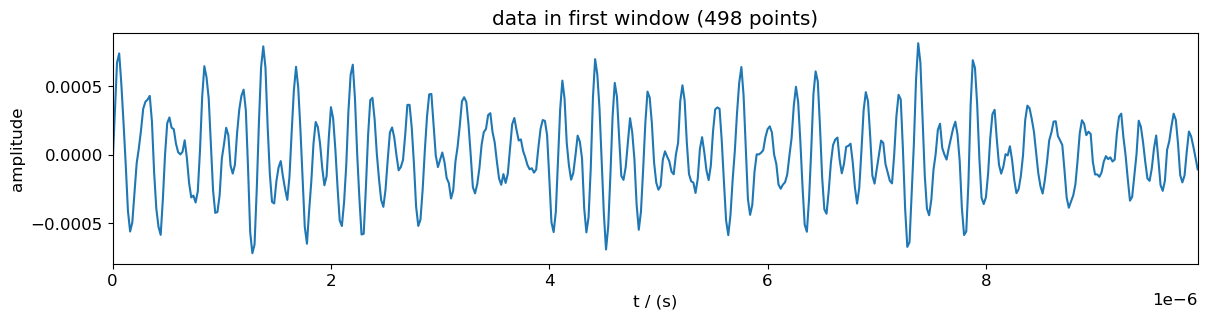

In [3]:
config = SpectrumConfig(delta_t=dt, data=filtered_noise, f_unit='Hz', 
                        spectrum_size=250, order_in='all', 
                        f_max=f_max, backend='cpu')

spec = SpectrumCalculator(config)

f, s, serr = spec.calc_spec()

Within the first frame we might already see that the signal contains a certain frequency.

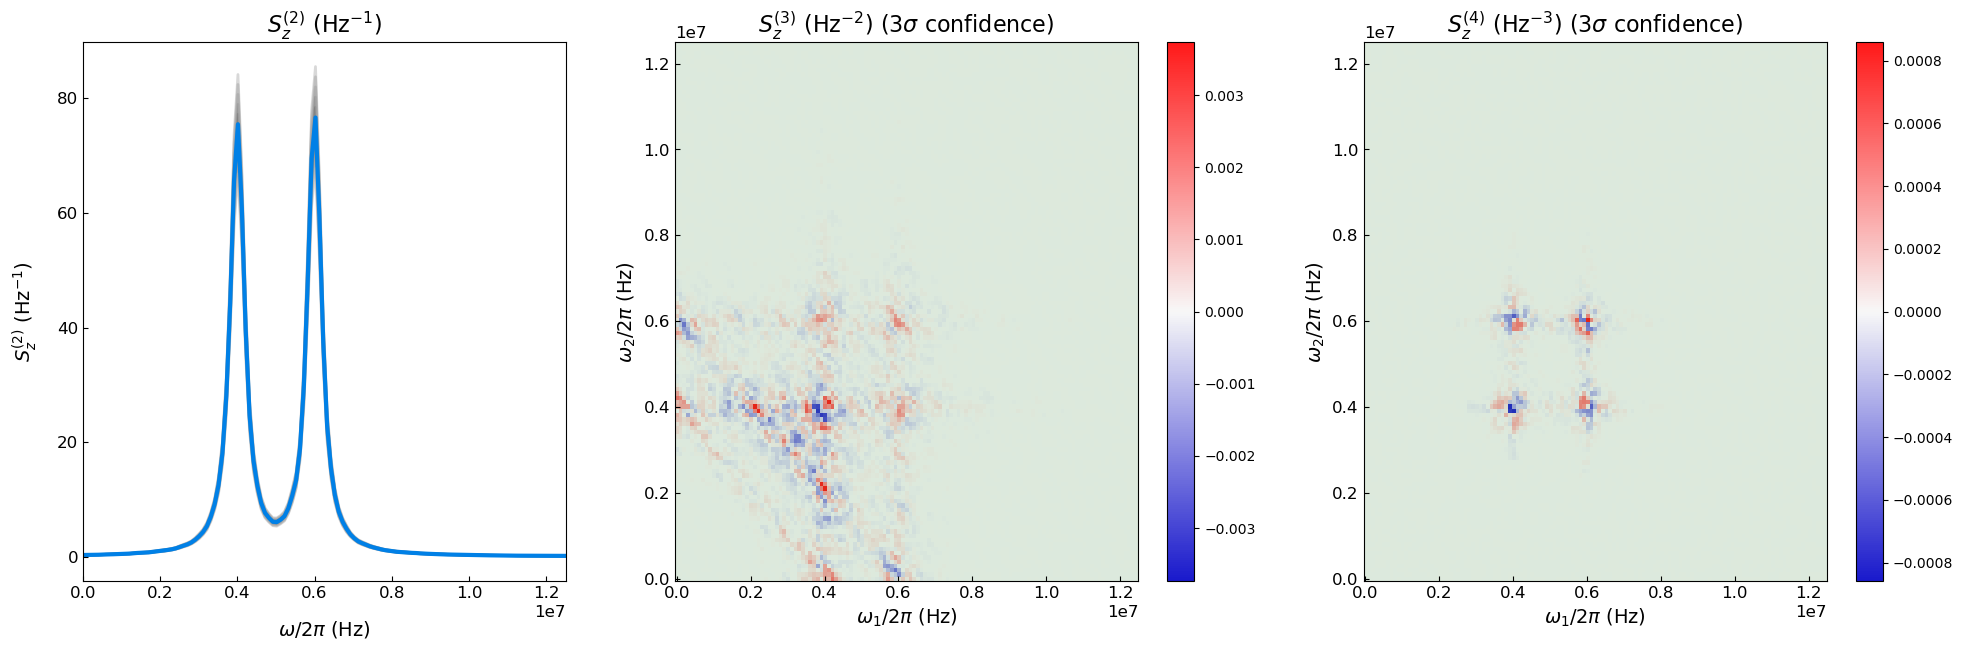

In [4]:
plot_config = PlotConfig(plot_orders=(2,3,4), plot_f_max=1.25e7, green_alpha=0.1, sigma=3)
fig = spec.plot(plot_config)

The power spectrum then clearly reveals that we are dealing with two frequencies. And since almost none of the points in the higher-order spectra are significant we can safely deduce that the signal stems from two uncorrelated sources.

## Mixing of Gaussian Noise

Now on to the more interesting part: We are going to use the two Gaussian signals to generate a new trace that will show higher-order contributions. This can be done by mixing (multiplying) the two signals. This will create contribution at the sum and differences of the two frequencies.

In [5]:
t = np.linspace(0,0.02,int(100e4))
dt = t[1] - t[0]
f_max = 1/(dt)/2
print('f_Nyquist =', f_max / 1e6, 'MHz')

white_noise_1 = np.random.normal(size=len(t))

white_noise_2 = np.random.normal(size=len(t))

freq = rfftfreq(len(t), t[1]-t[0])
f_c = 0.2e6 # Hz
f_1 = 0.4e7
P_1 = 1
filter_func_1 = P_1/(np.pi * f_c) / (1 + ((freq-f_1)/f_c)**2)

f_c = 0.2e6 # Hz
f_2 = 0.6e7
P_2 = 1
filter_func_2 = P_2/(np.pi * f_c) / (1 + ((freq-f_2)/f_c)**2)

filtered_noise = (irfft(np.sqrt(filter_func_1) * rfft(white_noise_1))+ 0.0001)
filtered_noise *= (irfft(np.sqrt(filter_func_2) * rfft(white_noise_2))+0.0001)

f_Nyquist = 24.999975 MHz


T_window: 1.000e-05 s
Maximum frequency: 2.500e+07 Hz


  0%|          | 0/100 [00:00<?, ?it/s]

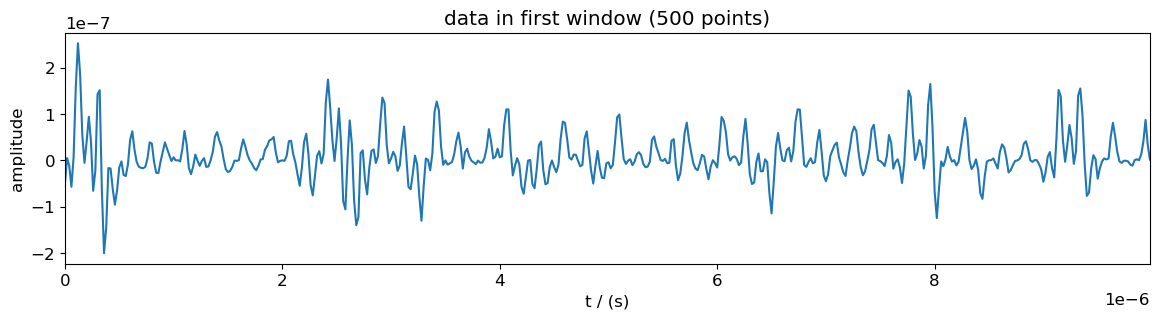

In [6]:
config = SpectrumConfig(delta_t=dt, data=filtered_noise, f_unit='Hz', 
                        spectrum_size=251, order_in='all', 
                        f_max=f_max, backend='cpu')

spec = SpectrumCalculator(config)

f, s, serr = spec.calc_spec()

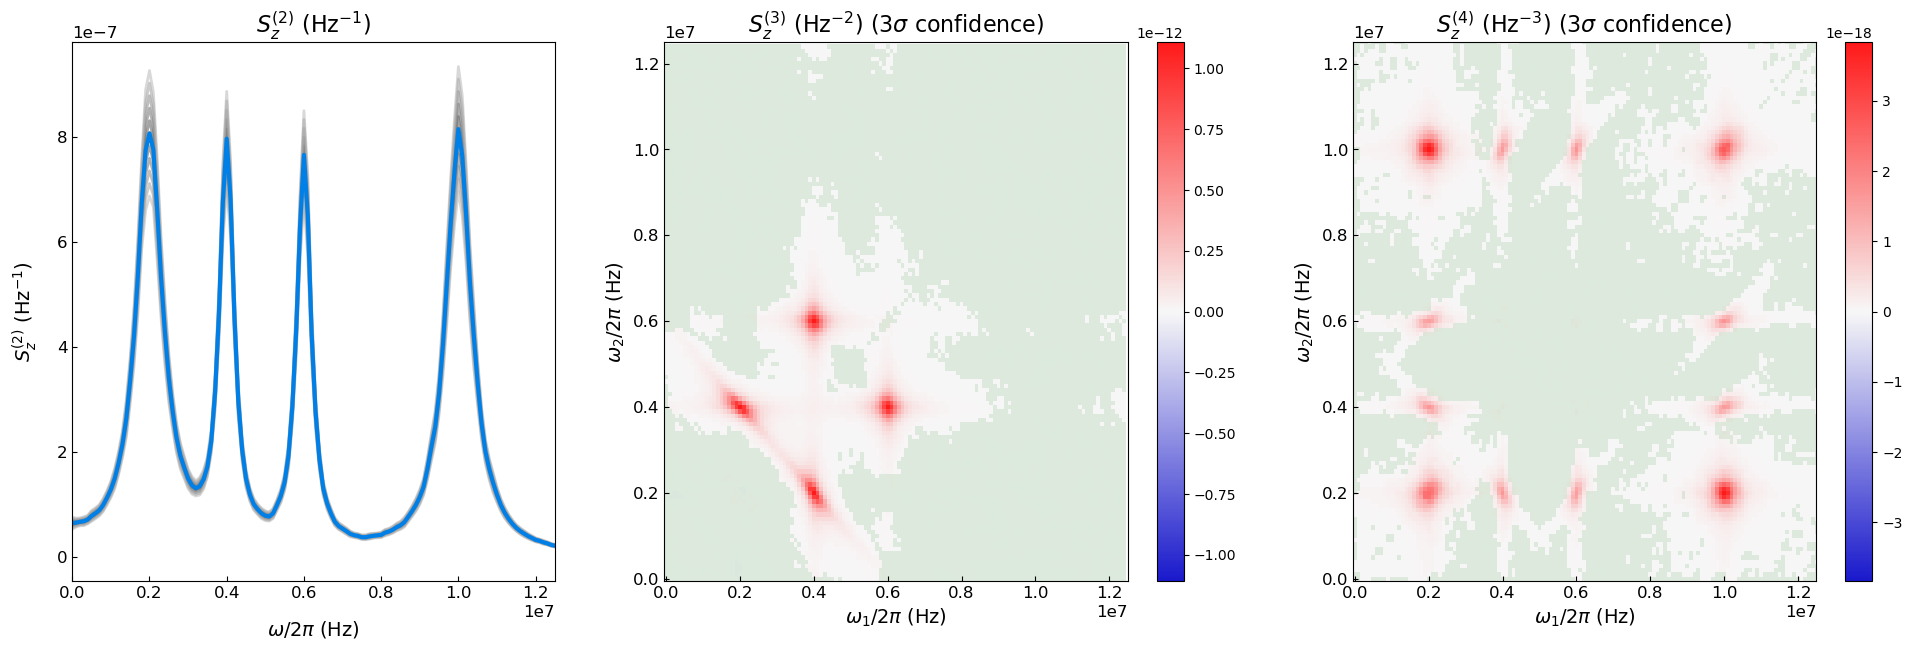

In [7]:
plot_config = PlotConfig(plot_f_max=1.25e7, green_alpha=0.1, sigma=3)
fig = spec.plot(plot_config)

As predicted, the peaks at 2, 4, 6, and 10 MHz are visible. More so, significant correlations are visible in the higher-order spectra. (Note that without the error estimation there would be no way telling the blue spots in the S4 (4, 6) MHz are just noise in contrast to the positive correlations.) In the bispectrum (S3) the phase correlation between the source and the mixed signal produce significant peaks, which would in hint sight be a fingerprint for mixing.